# installing packages

In [4]:
install.packages('tidyverse')

Installing package into 'C:/Users/NoteBook/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\NoteBook\AppData\Local\Temp\RtmpmuPBuC\downloaded_packages


In [2]:
library(tidyverse)

# reading data set

In [3]:
data = read.csv('G1_Allometry.csv')

In [4]:
head(data)

,species,diameter,height,leafarea,branchmass
,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,PSME,54.61,“27.03999951”,338.485622,410.24638
2,PSME,34.80,"27,4199988",122.157864,83.65030
3,PSME,24.89,NA,3.958274,3.51270
4,PSME,28.70,"24,95999968",86.350653,73.13027
5,PSME,34.80,"29,98999968",63.350906,62.39044
6,PSME,37.85,"28,06999906",61.372765,53.86594


In [5]:
tail(data)

,species,diameter,height,leafarea,branchmass
,<chr>,<dbl>,<chr>,<dbl>,<dbl>
58,PIMO,73.66,44.64000038,277.494360,275.71655
59,PIMO,28.19,22.59000012,131.856837,91.76231
60,PIMO,61.47,44.9899975,121.428976,199.86339
61,PIMO,51.56,40.22999936,212.443589,220.55688
62,PIMO,18.29,12.97999965,82.093031,28.04785
63,PIMO,8.38,"4,949999798",6.551044,4.36969


In [7]:
str(data)

'data.frame':	63 obs. of  5 variables:
 $ species   : chr  "PSME" "PSME" "PSME" "PSME" ...
 $ diameter  : num  54.6 34.8 24.9 28.7 34.8 ...
 $ height    : chr  "“27.03999951”" "27,4199988" NA "24,95999968" ...
 $ leafarea  : num  338.49 122.16 3.96 86.35 63.35 ...
 $ branchmass: num  410.25 83.65 3.51 73.13 62.39 ...


In [8]:
colnames(data)

[1] "species"    "diameter"   "height"     "leafarea"   "branchmass"

In [9]:
nrow(data)
ncol(data)

[1] 63

[1] 5

In [10]:
summary(data)

   species             diameter        height             leafarea      
 Length:63          Min.   : 4.83   Length:63          Min.   :  2.636  
 Class :character   1st Qu.:21.59   Class :character   1st Qu.: 28.581  
 Mode  :character   Median :34.80   Mode  :character   Median : 86.351  
                    Mean   :35.56                      Mean   :113.425  
                    3rd Qu.:51.44                      3rd Qu.:157.459  
                    Max.   :73.66                      Max.   :417.209  
   branchmass      
 Min.   :   1.778  
 1st Qu.:  16.878  
 Median :  72.029  
 Mean   : 145.011  
 3rd Qu.: 162.750  
 Max.   :1182.422  

In [11]:
# to count the number of missing values
sum(is.na(data))

[1] 6

### check duplicate data

In [13]:
# view duplicates
data[duplicated(data), ]

species,diameter,height,leafarea,branchmass
<chr>,<dbl>,<chr>,<dbl>,<dbl>


In [12]:
any(duplicated(data))

[1] FALSE

### view rows that has NA, missing values

In [14]:
data[is.na(data),]

,species,diameter,height,leafarea,branchmass
,<chr>,<dbl>,<chr>,<dbl>,<dbl>
NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA


In [15]:
sum(is.null(df))

[1] 0

# Data Cleaning

In [16]:
data[!complete.cases(data),]

,species,diameter,height,leafarea,branchmass
,<chr>,<dbl>,<chr>,<dbl>,<dbl>
3,PSME,24.89,NA,3.958274,3.51270
7,PSME,22.61,NA,32.077794,22.22474
8,PSME,39.37,NA,147.270523,119.38869
20,PSME,13.51,NA,65.698749,34.93701
30,PIPO,38.86,NA,46.326060,58.24071
53,PIMO,37.85,NA,154.078625,72.02907


## working on height column

In [17]:
data$height[1]
typeof(data$height[1])

[1] "“27.03999951”"

[1] "character"

In [18]:
# remove unwanted characters from the text values and convert to numeric
data$height = gsub(',','.', data$height)
data$height <- as.numeric(gsub("[^0-9.,-]", "", data$height))

In [19]:
mean_height <- mean(data$height, na.rm = T)
mean_height

[1] 26.01825

replace na values in height with the calculated mean

In [20]:
data$height[is.na(data$height)] <- mean_height

In [21]:
data$height

[1] 27.040000 27.419999 26.018245 24.960000 29.990000 28.069999 26.018245
 [8] 26.018245 30.100000 25.849999 31.830000 31.350000 32.610000 31.699998
[15] 30.179998  4.950000  5.260000  5.580000  6.470000 26.018245 33.300000
[22] 19.390000 39.369999 35.810000 20.800001 29.110001 22.399999 27.690001
[29] 35.580000 26.018245 41.160003 23.340000 25.940001 25.110000 30.389999
[36] 28.399999 23.380001 31.729999  7.360001  3.570000 31.929997  6.920000
[43]  5.849999 35.139998 39.840003 40.659999 38.889998 36.240000 23.130000
[50] 37.589998 21.289999 13.440000 26.018245 29.049999 35.519999  5.420000
[57] 34.559999 44.640000 22.590000 44.989998 40.229999 12.980000  4.950000

In [22]:
# round values
data$height <- round(data$height, 3)
data$height

[1] 27.040 27.420 26.018 24.960 29.990 28.070 26.018 26.018 30.100 25.850
[11] 31.830 31.350 32.610 31.700 30.180  4.950  5.260  5.580  6.470 26.018
[21] 33.300 19.390 39.370 35.810 20.800 29.110 22.400 27.690 35.580 26.018
[31] 41.160 23.340 25.940 25.110 30.390 28.400 23.380 31.730  7.360  3.570
[41] 31.930  6.920  5.850 35.140 39.840 40.660 38.890 36.240 23.130 37.590
[51] 21.290 13.440 26.018 29.050 35.520  5.420 34.560 44.640 22.590 44.990
[61] 40.230 12.980  4.950

In [23]:
# chekck msissing data again
colSums(is.na(data))

species   diameter     height   leafarea branchmass 
         0          0          0          0          0

order the data by height

In [24]:
# order height
data <- data[order(data$height), ]

In [66]:
head(data)

,species,diameter,height,leafarea,branchmass
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
40,PIPO,4.83,3.57,2.636336,1.77810
16,PSME,5.33,4.95,4.851567,2.67065
63,PIMO,8.38,4.95,6.551044,4.36969
17,PSME,6.10,5.26,7.595163,3.57145
56,PIMO,6.48,5.42,7.650902,3.50621
18,PSME,7.37,5.58,11.502851,4.58916


changeing row number to be clear

In [25]:
# change rownames
rownames(data) <- paste0('item-', 1:nrow(data))
head(data)

,species,diameter,height,leafarea,branchmass
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
item-1,PIPO,4.83,3.57,2.636336,1.77810
item-2,PSME,5.33,4.95,4.851567,2.67065
item-3,PIMO,8.38,4.95,6.551044,4.36969
item-4,PSME,6.10,5.26,7.595163,3.57145
item-5,PIMO,6.48,5.42,7.650902,3.50621
item-6,PSME,7.37,5.58,11.502851,4.58916


## data slicing

In [26]:
# slicing
data[1,] # first row
data[, 1] # first column
data[1, 1] # first row, and first column
data[c(1, 2), ] # rows 1, 2

,species,diameter,height,leafarea,branchmass
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
item-1,PIPO,4.83,3.57,2.636336,1.7781


[1] "PIPO" "PSME" "PIMO" "PSME" "PIMO" "PSME" "PIPO" "PSME" "PIPO" "PIPO"
[11] "PIMO" "PIMO" "PSME" "PIPO" "PIMO" "PIPO" "PIMO" "PIMO" "PIPO" "PIPO"
[21] "PSME" "PIPO" "PSME" "PIPO" "PSME" "PSME" "PSME" "PSME" "PIPO" "PIMO"
[31] "PSME" "PSME" "PIPO" "PSME" "PIPO" "PIMO" "PIPO" "PSME" "PSME" "PSME"
[41] "PIPO" "PSME" "PSME" "PIPO" "PSME" "PIPO" "PSME" "PSME" "PIMO" "PIPO"
[51] "PIMO" "PIPO" "PIPO" "PIMO" "PIMO" "PIMO" "PIPO" "PIMO" "PIMO" "PIMO"
[61] "PIPO" "PIMO" "PIMO"

[1] "PIPO"

,species,diameter,height,leafarea,branchmass
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
item-1,PIPO,4.83,3.57,2.636336,1.77810
item-2,PSME,5.33,4.95,4.851567,2.67065


In [27]:
data[, c(3, 4)] # columns 3, 4

,height,leafarea
,<dbl>,<dbl>
item-1,3.570,2.636336
item-2,4.950,4.851567
item-3,4.950,6.551044
item-4,5.260,7.595163
item-5,5.420,7.650902
item-6,5.580,11.502851
item-7,5.850,14.493428
item-8,6.470,25.380647
item-9,6.920,15.476022


In [28]:
# access species column
data[['species']]
data$species

[1] "PIPO" "PSME" "PIMO" "PSME" "PIMO" "PSME" "PIPO" "PSME" "PIPO" "PIPO"
[11] "PIMO" "PIMO" "PSME" "PIPO" "PIMO" "PIPO" "PIMO" "PIMO" "PIPO" "PIPO"
[21] "PSME" "PIPO" "PSME" "PIPO" "PSME" "PSME" "PSME" "PSME" "PIPO" "PIMO"
[31] "PSME" "PSME" "PIPO" "PSME" "PIPO" "PIMO" "PIPO" "PSME" "PSME" "PSME"
[41] "PIPO" "PSME" "PSME" "PIPO" "PSME" "PIPO" "PSME" "PSME" "PIMO" "PIPO"
[51] "PIMO" "PIPO" "PIPO" "PIMO" "PIMO" "PIMO" "PIPO" "PIMO" "PIMO" "PIMO"
[61] "PIPO" "PIMO" "PIMO"

[1] "PIPO" "PSME" "PIMO" "PSME" "PIMO" "PSME" "PIPO" "PSME" "PIPO" "PIPO"
[11] "PIMO" "PIMO" "PSME" "PIPO" "PIMO" "PIPO" "PIMO" "PIMO" "PIPO" "PIPO"
[21] "PSME" "PIPO" "PSME" "PIPO" "PSME" "PSME" "PSME" "PSME" "PIPO" "PIMO"
[31] "PSME" "PSME" "PIPO" "PSME" "PIPO" "PIMO" "PIPO" "PSME" "PSME" "PSME"
[41] "PIPO" "PSME" "PSME" "PIPO" "PSME" "PIPO" "PSME" "PSME" "PIMO" "PIPO"
[51] "PIMO" "PIPO" "PIPO" "PIMO" "PIMO" "PIMO" "PIPO" "PIMO" "PIMO" "PIMO"
[61] "PIPO" "PIMO" "PIMO"

In [29]:
# add new colulumn
data$new_column <- c(1:nrow(data))
head(data)

,species,diameter,height,leafarea,branchmass,new_column
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
item-1,PIPO,4.83,3.57,2.636336,1.77810,1
item-2,PSME,5.33,4.95,4.851567,2.67065,2
item-3,PIMO,8.38,4.95,6.551044,4.36969,3
item-4,PSME,6.10,5.26,7.595163,3.57145,4
item-5,PIMO,6.48,5.42,7.650902,3.50621,5
item-6,PSME,7.37,5.58,11.502851,4.58916,6


In [30]:
# delete the new added column
data$new_column = NULL
head(data)

,species,diameter,height,leafarea,branchmass
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
item-1,PIPO,4.83,3.57,2.636336,1.77810
item-2,PSME,5.33,4.95,4.851567,2.67065
item-3,PIMO,8.38,4.95,6.551044,4.36969
item-4,PSME,6.10,5.26,7.595163,3.57145
item-5,PIMO,6.48,5.42,7.650902,3.50621
item-6,PSME,7.37,5.58,11.502851,4.58916


## digramms

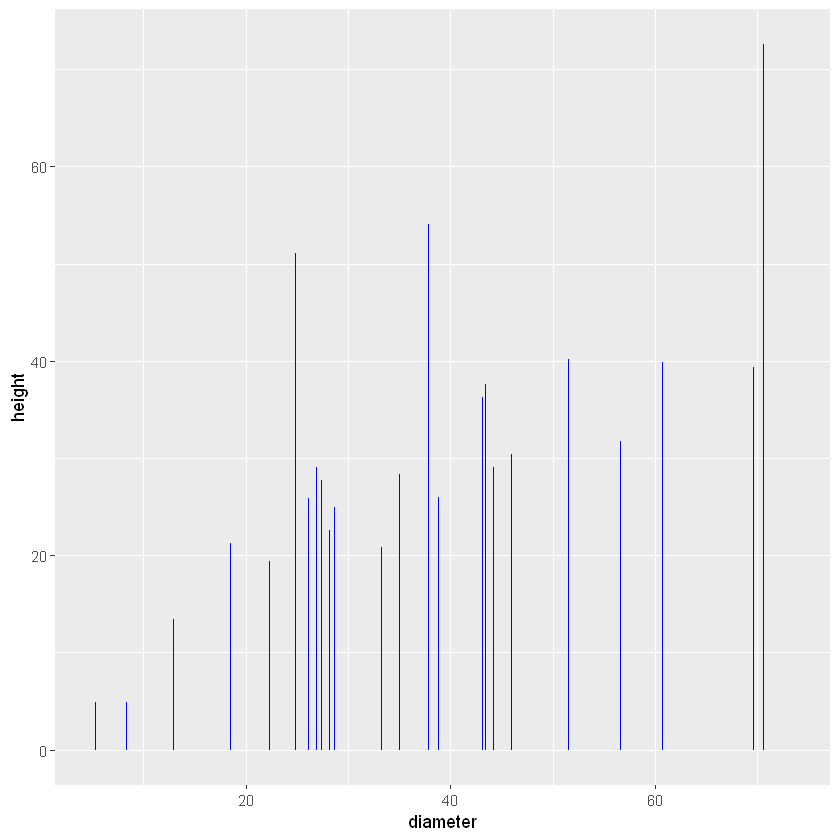

In [31]:
ggplot(data, aes(x=diameter, y=height)) +
geom_bar(stat = "identity", fill = "blue")

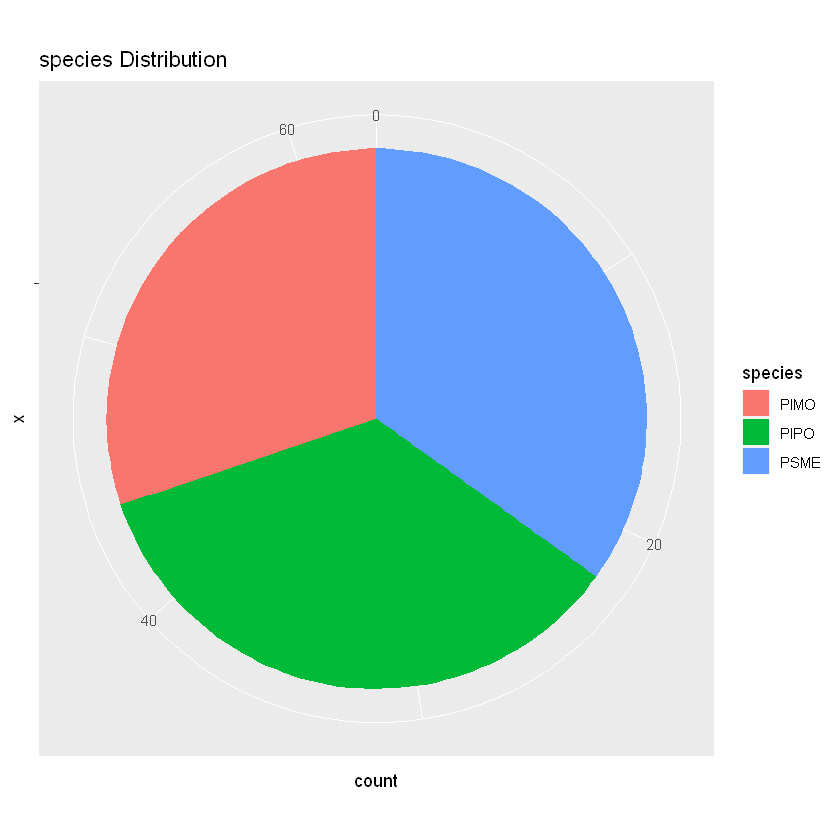

In [32]:
ggplot(data, aes(x = "", fill = species)) + 
  geom_bar(width = 1) + 
  coord_polar(theta = "y") + 
  labs(title = "species Distribution")

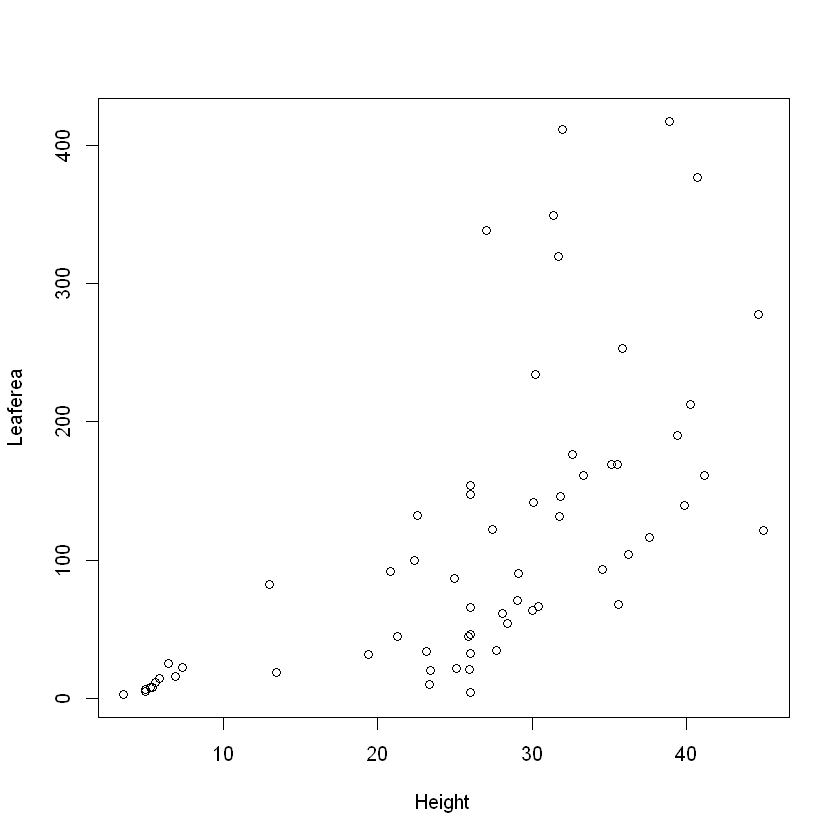

In [33]:
plot(data$height, data$leafarea, col='black', cex=1, xlab='Height', ylab='Leaferea')

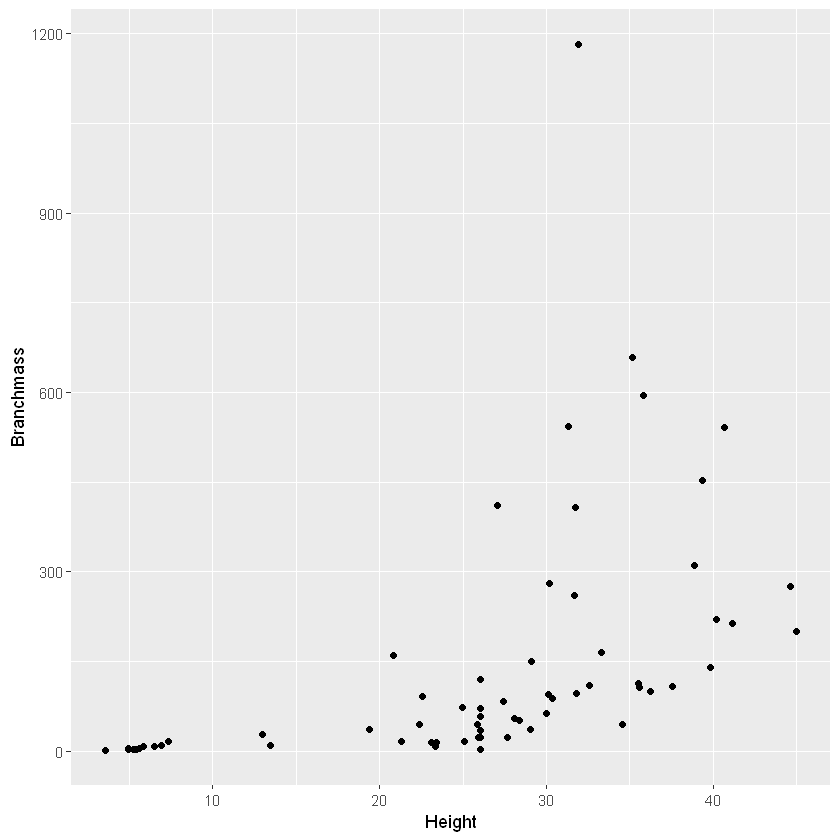

In [34]:
ggplot(data, aes(x = height, y = branchmass)) + 
geom_point() +
labs(x='Height', y='Branchmass')

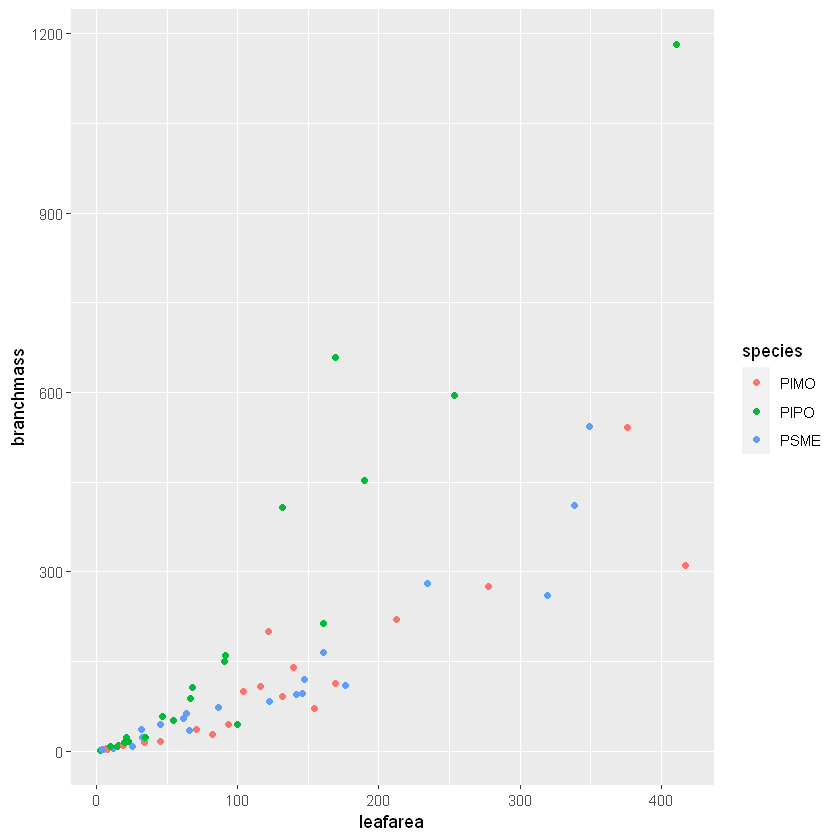

In [35]:
ggplot(data, aes(y = branchmass, x =leafarea ,  color = species ))+ 
  geom_point()

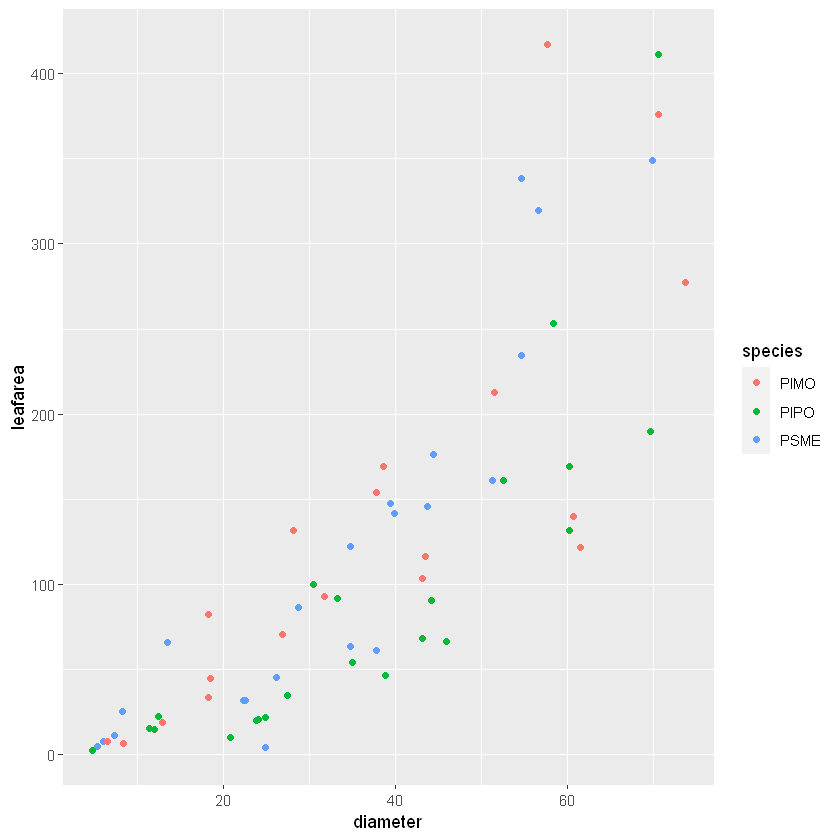

In [36]:
ggplot(data, aes(x = diameter, y =leafarea ,  color = species ))+ 
  geom_point()

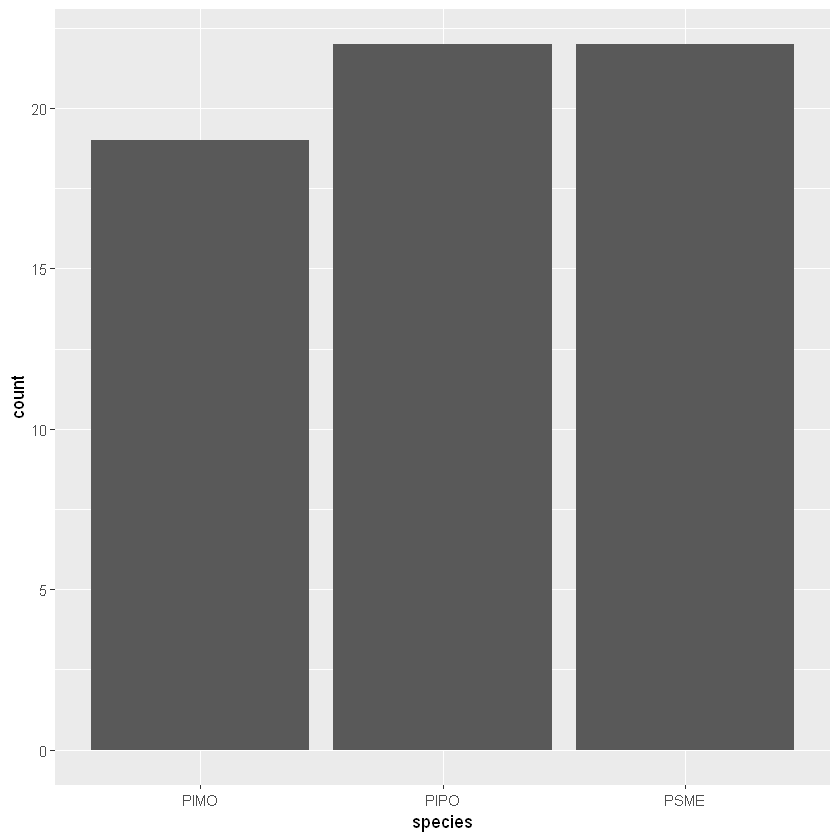

In [37]:
ggplot(data   , aes(x = species)) + 
  geom_bar()